# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I flew to LHR from ATH in C...
1,✅ Trip Verified | I like the British Airways ...
2,✅ Trip Verified | I have come to boarding and...
3,✅ Trip Verified | Stinking nappies being chang...
4,✅ Trip Verified | Worst service ever. Lost bag...


In [ ]:
df.to_csv("reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
data=pd.read_csv('/content/reviews.csv')
data.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | I flew to LHR from ATH in C...
1,1,✅ Trip Verified | I like the British Airways ...
2,2,✅ Trip Verified | I have come to boarding and...
3,3,✅ Trip Verified | Stinking nappies being chang...
4,4,✅ Trip Verified | Worst service ever. Lost bag...


### Analyzing the reviews

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
data.columns

Index(['Unnamed: 0', 'reviews'], dtype='object')

In [ ]:
#removing extar column
data.drop(columns =['Unnamed: 0'], inplace=True)

In [ ]:
data.info

<bound method DataFrame.info of                                                reviews
0    ✅ Trip Verified |  I flew to LHR from ATH in C...
1    ✅ Trip Verified |  I like the British Airways ...
2    ✅ Trip Verified |  I have come to boarding and...
3    ✅ Trip Verified | Stinking nappies being chang...
4    ✅ Trip Verified | Worst service ever. Lost bag...
..                                                 ...
995  ✅ Trip Verified |  London to Chicago. Could it...
996  ✅ Trip Verified |  Prague to London Heathrow. ...
997  ✅ Trip Verified |  London City to Florence. My...
998  ✅ Trip Verified |  London to Johannesburg. Sin...
999  ✅ Trip Verified |  Doha to London Heathrow. Fl...

[1000 rows x 1 columns]>

In [ ]:
#first round of cleaning
import re
import string

# Function for converting into lowercase, removing numbers, and punctuations
def text_clean(text):
    if isinstance(text, tuple):
        # Handle tuples if present in the 'reviews' column
        cleaned_text = ' '.join(map(str, text))
    else:
        # If it's not a tuple, assume it's a string
        cleaned_text = text

    cleaned_text = cleaned_text.lower()
    cleaned_text = re.sub('\[.*?/]','', cleaned_text)
    cleaned_text = re.sub('[%s]' % re.escape(string.punctuation), '', cleaned_text)
    cleaned_text = re.sub('\w*\d\w*', '', cleaned_text)

    return cleaned_text

# Applying the cleaning function to the 'reviews' column
data['cleaned_reviews'] = data['reviews'].apply(text_clean)
data.head(10)


,reviews,cleaned_reviews
0,✅ Trip Verified | I flew to LHR from ATH in C...,✅ trip verified i flew to lhr from ath in cl...
1,✅ Trip Verified | I like the British Airways ...,✅ trip verified i like the british airways w...
2,✅ Trip Verified | I have come to boarding and...,✅ trip verified i have come to boarding and ...
3,✅ Trip Verified | Stinking nappies being chang...,✅ trip verified stinking nappies being change...
4,✅ Trip Verified | Worst service ever. Lost bag...,✅ trip verified worst service ever lost bagga...
5,✅ Trip Verified | BA 246 21JAN 2023 Did not a...,✅ trip verified ba did not appreciate the...
6,✅ Trip Verified | Not a great experience. I co...,✅ trip verified not a great experience i coul...
7,Not Verified | I was excited to fly BA as I'd ...,not verified i was excited to fly ba as id no...
8,Not Verified | I just want to warn everyone o...,not verified i just want to warn everyone of...
9,Not Verified | Paid for business class travell...,not verified paid for business class travelli...


In [ ]:
#Second round of cleaning
def text_clean2(text):
  text=re.sub('[''"",,,]','',text)
  text=re.sub('\n','',text)
  return text
cleaned2 =lambda x:text_clean2(x)

In [ ]:
# Applying the cleaning function to the 'reviews' column
data['cleaned_reviews_new'] =pd.DataFrame(data['cleaned_reviews'].apply(cleaned2))
data.head(10)

,reviews,cleaned_reviews,cleaned_reviews_new
0,✅ Trip Verified | I flew to LHR from ATH in C...,✅ trip verified i flew to lhr from ath in cl...,✅ trip verified i flew to lhr from ath in cl...
1,✅ Trip Verified | I like the British Airways ...,✅ trip verified i like the british airways w...,✅ trip verified i like the british airways w...
2,✅ Trip Verified | I have come to boarding and...,✅ trip verified i have come to boarding and ...,✅ trip verified i have come to boarding and ...
3,✅ Trip Verified | Stinking nappies being chang...,✅ trip verified stinking nappies being change...,✅ trip verified stinking nappies being change...
4,✅ Trip Verified | Worst service ever. Lost bag...,✅ trip verified worst service ever lost bagga...,✅ trip verified worst service ever lost bagga...
5,✅ Trip Verified | BA 246 21JAN 2023 Did not a...,✅ trip verified ba did not appreciate the...,✅ trip verified ba did not appreciate the...
6,✅ Trip Verified | Not a great experience. I co...,✅ trip verified not a great experience i coul...,✅ trip verified not a great experience i coul...
7,Not Verified | I was excited to fly BA as I'd ...,not verified i was excited to fly ba as id no...,not verified i was excited to fly ba as id no...
8,Not Verified | I just want to warn everyone o...,not verified i just want to warn everyone of...,not verified i just want to warn everyone of...
9,Not Verified | Paid for business class travell...,not verified paid for business class travelli...,not verified paid for business class travelli...


### Visualization

In [50]:
pip install pandas matplotlib seaborn wordcloud


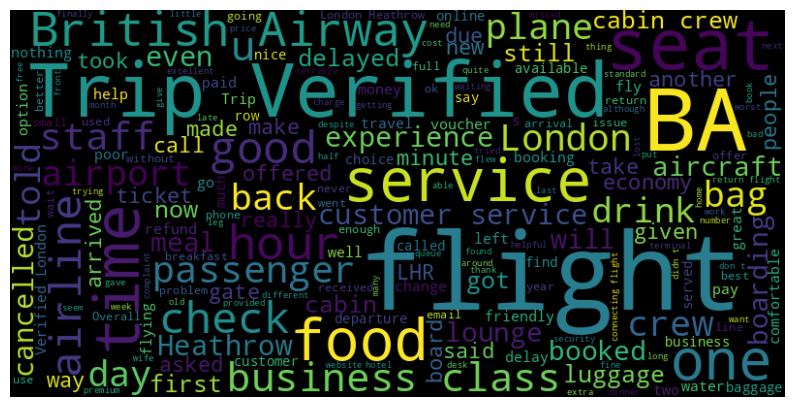

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(df['reviews']))

# Plot Word Cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


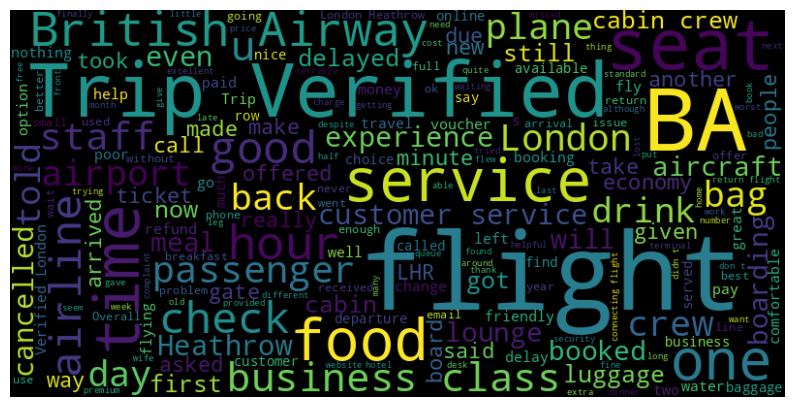

Top 25 most common words:
flight: 1750
BA: 1072
Trip Verified: 772
seat: 696
time: 538
service: 469
food: 432
one: 422
British Airway: 420
hour: 419
good: 375
airline: 360
check: 358
u: 318
business class: 308
staff: 286
passenger: 273
London: 261
bag: 249
back: 246
plane: 246
airport: 244
day: 239
crew: 234
told: 227


In [57]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into a single string
all_text = ' '.join(df['reviews'])  # Replace 'your_review_column' with the actual column name

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110)
wordcloud.generate(all_text)

# Process text and get word frequencies as a dictionary
word_frequencies = wordcloud.process_text(all_text)

# Get the top 25 words
top_25_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:25]

# Plot Word Cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Print the top 25 most common words with their frequencies
print("Top 25 most common words:")
for word, freq in top_25_words:
    print(f"{word}: {freq}")
